Importing Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing

##Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Training/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Training/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convulation Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))  #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 480s 5s/step - loss: 3.7095 - accuracy: 0.0408 - val_loss: 16.8109 - val_accuracy: 0.0285
Epoch 2/30
98/98 [==============================] - 120s 1s/step - loss: 4.3871 - accuracy: 0.0510 - val_loss: 3.5461 - val_accuracy: 0.0855
Epoch 3/30
98/98 [==============================] - 112s 1s/step - loss: 3.7197 - accuracy: 0.0777 - val_loss: 3.2278 - val_accuracy: 0.2393
Epoch 4/30
98/98 [==============================] - 119s 1s/step - loss: 3.7128 - accuracy: 0.1005 - val_loss: 3.0714 - val_accuracy: 0.2450
Epoch 5/30
98/98 [==============================] - 120s 1s/step - loss: 3.6132 - accuracy: 0.1474 - val_loss: 2.6848 - val_accuracy: 0.3704
Epoch 6/30
98/98 [==============================] - 109s 1s/step - loss: 3.4361 - accuracy: 0.1981 - val_loss: 2.5037 - val_accuracy: 0.3903
Epoch 7/30
98/98 [==============================] - 118s 1s/step - loss: 3.1389 - accuracy: 0.2443 - val_loss: 2.3184 - val_accuracy: 0.4501
Epoch 8/30
9

#Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history  #Return Dictionary of History

{'loss': [3.7094619274139404,
  4.387084484100342,
  3.7197248935699463,
  3.7127861976623535,
  3.61319637298584,
  3.436124324798584,
  3.1388800144195557,
  3.6158089637756348,
  2.9890575408935547,
  2.419132709503174,
  2.4285826683044434,
  2.2158470153808594,
  1.9990891218185425,
  1.9425064325332642,
  2.0151195526123047,
  1.9256019592285156,
  1.5283321142196655,
  1.6631929874420166,
  1.3971872329711914,
  1.357578992843628,
  1.328126072883606,
  1.300910234451294,
  1.2508037090301514,
  1.3446431159973145,
  1.2100085020065308,
  1.1130067110061646,
  1.008691668510437,
  1.04348623752594,
  0.9371553659439087,
  1.0863432884216309],
 'accuracy': [0.04077046364545822,
  0.05104333907365799,
  0.07768860459327698,
  0.1004815399646759,
  0.14735151827335358,
  0.1980738341808319,
  0.24430176615715027,
  0.3020866811275482,
  0.34574639797210693,
  0.4157303273677826,
  0.4471909999847412,
  0.483146071434021,
  0.5197432041168213,
  0.5669341683387756,
  0.6035313010215

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accurcay of Model Achieved on Validation Set

In [ ]:
print('Validation set accuracy : {} %'.format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy : 61.82336211204529 %


#Accuracy Visualization

##Training Visualization


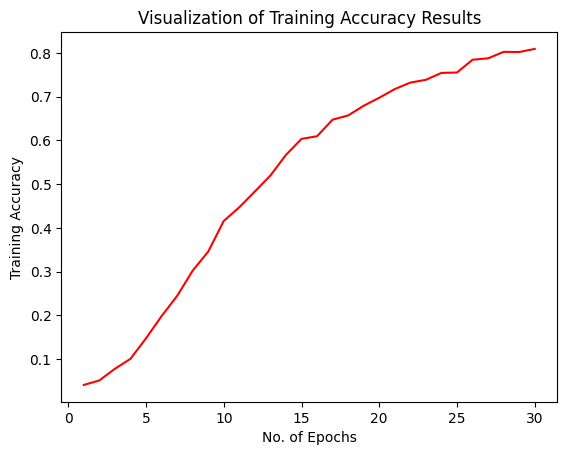

In [ ]:
epochs=[i for i in range (1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Results')
plt.show()

#Validation Accuracy

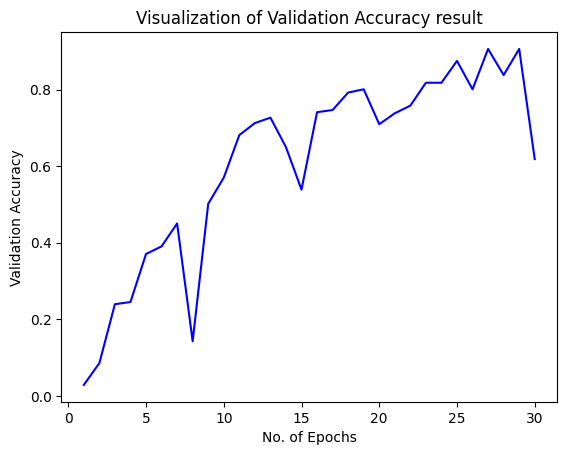

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel("Validation Accuracy")
plt.title("Visualization of Validation Accuracy result")
plt.show()